In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

data=pd.read_csv("data\\framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

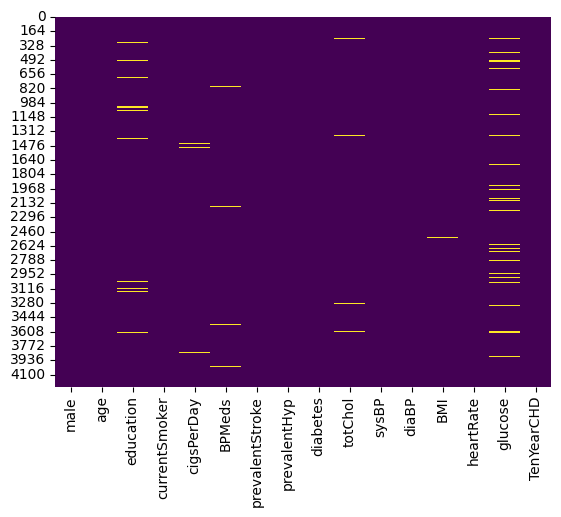

In [7]:
#visualize NAs in the dataframe using heatmap
sb.heatmap(data.isnull(), cbar=False, cmap="viridis")

<Axes: >

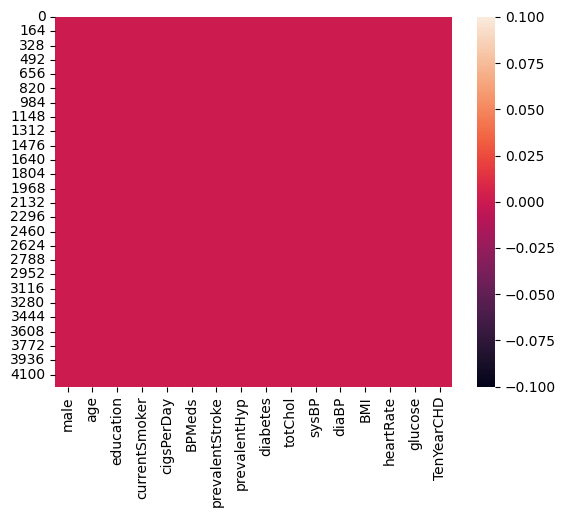

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data)
imputed_df= pd.DataFrame(imputed_data, columns=data.columns)


<Axes: >

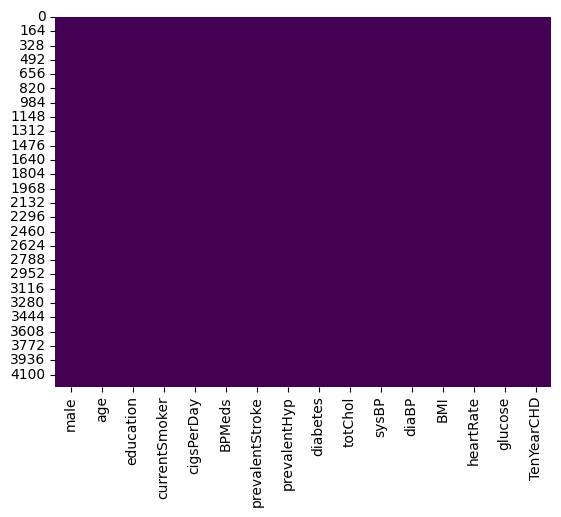

In [8]:
sb.heatmap(imputed_df.isnull(), cbar=False, cmap="viridis")

In [ ]:
# imputed_df.to_csv("data\\framingham_imputed.csv", index=False)

<Axes: title={'center': 'Ten Year CHD Distribution'}, xlabel='TenYearCHD'>

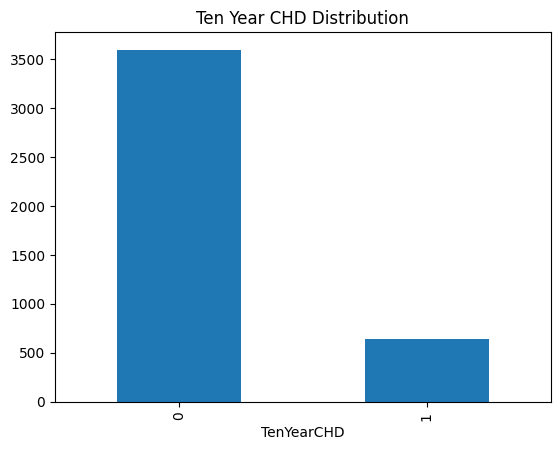

In [12]:
data["TenYearCHD"].value_counts().plot(kind='bar', title='Ten Year CHD Distribution')

In [14]:
y=imputed_df["TenYearCHD"]
X=imputed_df.drop(columns=["TenYearCHD"],axis=1)

In [17]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0.0,48.0,2.0,1.0,20.0,0.2,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8


In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[ 1.1531919 , -1.23495068,  2.00084518, ...,  0.28668738,
         0.34265   , -0.21257509],
       [-0.86715836, -0.41825733,  0.02060607, ...,  0.71887711,
         1.59015927, -0.25605995],
       [ 1.1531919 , -0.18491638, -0.96951348, ..., -0.11357925,
        -0.07318643, -0.51696911],
       ...,
       [-0.86715836, -0.18491638,  0.02060607, ..., -0.93375749,
         0.67531914,  0.17878865],
       [-0.86715836, -0.65159829, -0.96951348, ..., -1.63115457,
         0.84165371, -0.22127206],
       [-0.86715836,  0.28176554,  0.02060607, ..., -1.06390554,
         0.34265   ,  1.09197071]], shape=(4238, 15))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000,class_weight="balanced")
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [65]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.66
Confusion Matrix:
[[720 364]
 [ 64 124]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      1084
         1.0       0.25      0.66      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.66      0.57      1272
weighted avg       0.82      0.66      0.71      1272



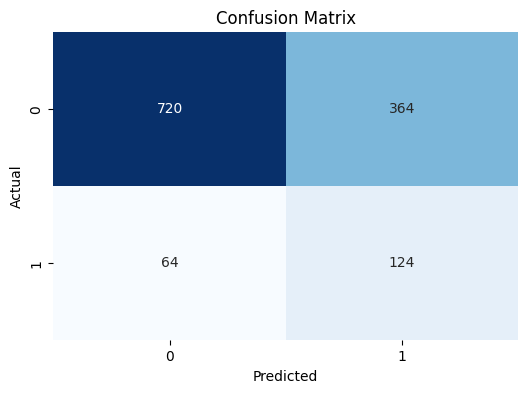

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()